# Unit Simulation Examples

In [13]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import itertools as it

%matplotlib inline
%load_ext autoreload

import sys
# our simulator
import battlesim as bsm
%autoreload battlesim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Trial 1. 50 Clone Troopers vs. 70 B1 battledroids

Using Random AI selection for targets.

In [14]:
cols = {0:'red',1:'blue'}
labels = {0:'Republic',1:'CIS'}

In [22]:
trial1 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial1.create_army([("B1 battledroid", 80), ("Clone Trooper", 50)])
# battle droids near (0, 0), clones near (10, 10)
trial1.apply_position([bsm.Distribution(loc=2, scale=2), bsm.Distribution(loc=10)])
trial1.set_rolling_ai(["random","nearest"])
# run a battle
F = trial1.simulate()

In [23]:
HTML(bsm.quiver_fight(F,labels,cols).to_jshtml())

In [50]:
_ = bsm.quiver_fight(F,labels,cols).save("simulations/sim1.gif",writer="pillow")

In [51]:
K = trial1.simulate_k(k=40)

### Trial 2. 50 Clone Troopers versus 200 B1 battledroids.

When the droids outnumber the clones 4:1, the droids seem to win every time.

Here we introduce 'grid' based formats for beginning the troops in.

Again, we use Random AI selection for targets.

In [26]:
trial2 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial2.create_army([("B1 battledroid", 200), ("Clone Trooper", 50)])
# battle droids near (0, 0), clones near (10, 10)
trial2.apply_position_uniform([(-1, 1), (10, 1)])
# run a battle
F2 = trial2.simulate()

/home/gparkes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function apply_position_uniform.
  """


In [27]:
HTML(bsm.quiver_fight(F2,labels,cols).to_jshtml())

In [8]:
K = trial2.simulate_k(k=40)
K.gt(0).sum()

Republic     0
CIS         40
dtype: int64

### Trial 3. Two CIS armies against 1 Republic army. Pincer movement

Here, two of the army groups use the *nearest* AI selection, which finds the nearest enemy to attack once finished with one enemy.

In [28]:
trial3 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial3.create_army([("B1 battledroid", 50), ("Clone Trooper", 60), ("B1 battledroid", 50)])
# battle droids near (0, 0), clones near (10, 10)
trial3.apply_position_gaussian([(0, 1), (5, 1), (10, 1)])
# set AI for initialisation
trial3.set_initial_ai(["nearest", "nearest", "random"])
# set AI upon death
trial3.set_rolling_ai(["nearest"]*3)
# run a battle
F3 = trial3.simulate()

/home/gparkes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function apply_position_gaussian.
  """


In [29]:
HTML(bsm.quiver_fight(F3,labels,cols).to_jshtml())

In [52]:
bsm.quiver_fight(F3,labels,cols).save("simulations/sim2.gif",writer="pillow")

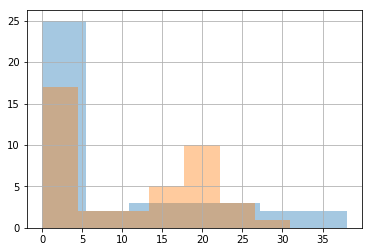

In [30]:
K = trial3.simulate_k(k=40)
K["CIS"].hist(bins=7,alpha=.4)
K["Republic"].hist(bins=7,alpha=.4)

### Trial 4: Quadrupal Pincer movement against the Republic

Here all units are using the more efficient (but slower) *nearest* AI selection strategy.

In [31]:
trial4 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial4.create_army([("B1 battledroid", 10), ("Clone Trooper", 25),
                    ("B1 battledroid", 10), ("B1 battledroid", 10), ("B1 battledroid", 10)])
# battle droids near (0, 0), clones near (10, 10)
trial4.apply_position([bsm.Distribution(),bsm.Distribution(loc=5),
                       bsm.Distribution(loc=10), bsm.Distribution().setx(loc=10),
                       bsm.Distribution().sety(loc=10)])
# establish initial AI
trial4.set_initial_ai(["nearest"]*5)
# establish permanent AI on death
trial4.set_rolling_ai(["nearest"]*5)

# run a battle
F4 = trial4.simulate()

In [32]:
HTML(bsm.quiver_fight(F4,labels,cols).to_jshtml())

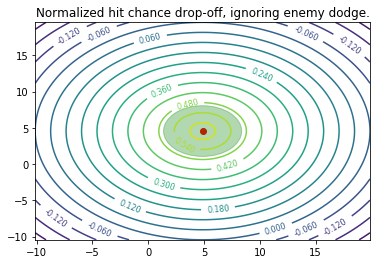

In [33]:
f, ax=bsm.accuracy_contour(trial4.M_, 10)

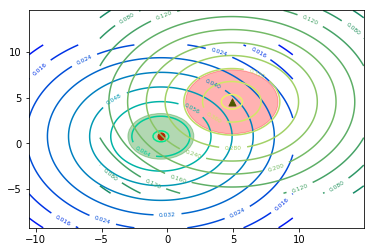

In [34]:
_=bsm.imageplot.hit_contour(trial4.M_, 0, 10)

### Trial 5: Incorporating different units: Magmaguard

For this one, we will use the same as before (B1 battledroids and Clone Troopers), except we'll throw in some melee-unit MagmaGuards into the mix. Magmaguards have very low range, but deal high damage, don't miss and have high HP.

In [39]:
trial5 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial5.create_army([("B1 battledroid", 20), ("Clone Trooper", 30),
                    ("B2 battledroid", 7), ("Magmaguard", 5)])
# battle droids near (0, 0), clones near (10, 10)
trial5.apply_position([bsm.Distribution(loc=2),bsm.Distribution(scale=1.5),
                       bsm.Distribution(loc=-1,scale=2),bsm.Distribution(loc=4,scale=3)])
trial5.set_initial_ai(["nearest"]*4)
trial5.set_rolling_ai(["random","nearest","random","nearest"])
# run a battle
F5 = trial5.simulate()

In [40]:
HTML(bsm.quiver_fight(F5,labels,cols).to_jshtml())

In [41]:
%timeit trial1.simulate()
%timeit trial2.simulate()
%timeit trial3.simulate()
%timeit trial4.simulate()
%timeit trial5.simulate()

44.2 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.9 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
75.1 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
39.2 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.9 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%timeit trial1.simulate_k()
%timeit trial2.simulate_k()
%timeit trial3.simulate_k()
%timeit trial4.simulate_k()
%timeit trial5.simulate_k()

247 ms ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
162 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
489 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
172 ms ± 6.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
119 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
